In [2]:
# SUJET : Comparaison des vainqueurs d’élections avec différents modes de vote

# par une étude probabiliste à partir de simulations
# de situations de vote - deux méthodes seront proches si elles ont le même vainqueur. C’est cette
# dernière comparaison que nous aimerions mettre en œuvre à partir d’un protocole de simulations.

# à partir des résultats obtenus par simulation, proposer une classification des méthodes par rapport aux
# vainqueurs obtenus pour chaque élection.

# générer les participants et les votes =>

# loi binomiale, loi uniforme, loi Bêta

# Pondorset, méthode de Gaut


# EXEMPLES MÉTHODES VOTES : Scrutin majoritaire à un tour, à deux tours, scrutin proportionnel,
# vote par approbation, scrutin par élimination, vote préférentiel, jugement majoritaire

# les meilleurs méthodes de votes dépendent du contexte et de ce que l'on veut faire
# exemple pour élection un des meilleurs => vote par approbation (simple et efficace)

# Parmi les méthodes de vote par évaluation,
# on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.

# donc comparer les méthodes de votes entre elles et regarder pour chacune le nombre et le degrès de satisfaction
# des votants


# LIENS UTILES : 
# https://www.lamsade.dauphine.fr/~mayag/Chapter_3_Aggregation_functions_Slides_V2.pdf
# https://github.com/simberaj/votelib
# https://pypi.org/project/condorcet/
# https://monlyceenumerique.fr/formations_python/python_2021/dl/lois_probabilites_simulation.html

# les cours de ce mec tout en  haut très utile (MASTER BDMA CentraleSupelec : Decision Modeling) :
# https://www.lamsade.dauphine.fr/~mayag/teaching.html


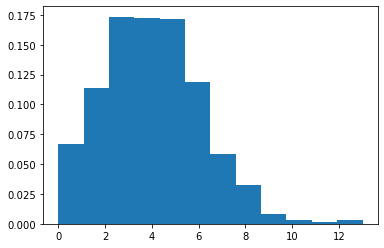

count :  [0.06646154 0.11353846 0.17353846 0.17261538 0.17169231 0.11907692
 0.05815385 0.03230769 0.00830769 0.00276923 0.00184615 0.00276923]
bins :  [ 0.          1.08333333  2.16666667  3.25        4.33333333  5.41666667
  6.5         7.58333333  8.66666667  9.75       10.83333333 11.91666667
 13.        ]
{'Pecresse': 6.646153846153846, 'Lepen': 11.353846153846154, 'Zemmour': 17.353846153846153, 'Roussel': 17.261538461538468, 'Melanchon': 17.169230769230772, 'Pouton': 11.907692307692301, 'Hidalgo': 5.815384615384617, 'Macron': 3.2307692307692317, 'DupontAignan': 0.8307692307692303, 'Lasalle': 0.2769230769230772, 'Arthaud': 0.18461538461538451, 'Jadot': 0.27692307692307677}
92.30769230769232 

GAGNANT =  Zemmour  avec  17.353846153846153  %


In [3]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np
import random

# Essayer pour 15aine, 20, 50, 100, 1000, 10 000 votants
# Essayer pour 3, 4, 5, 7, 10, 12 candidats

candidats = ["Macron","Lasalle","Pouton","DupontAignan","Zemmour","Pecresse","Jadot","Hidalgo","Melanchon","Lepen","Roussel","Arthaud"]
random.shuffle(candidats)

binomiale = np.random.binomial(50,1/len(candidats),1000)#une array de 1000 valeurs d'une loi binomiale de 50 tirages avec probabilité de succès (1/len(candidats).

counts, bins, bars = plt.hist(binomiale,bins=len(candidats),density=True)
plt.show()

print("count : ",counts)
print("bins : ",bins)

res = {}
cpt = 0
test = 0
for c in candidats:
    res[c] = counts[cpt]*100
    test += counts[cpt]*100
    cpt+=1
    #

print(res)
print(test,"\n")


for key,value in res.items():
    if value == max(res.values()):
        print("GAGNANT = ",key," avec ",value," %")

In [4]:
# $ pip install votelib
# https://github.com/simberaj/votelib

import votelib
from votelib.evaluate.sequential import TransferableVoteSelector
from votelib import *

votes = {
    ('Mary Robinson',): 612265,
    ('Brian Lenihan',): 694484,
    ('Austin Currie', 'Brian Lenihan'): 36789,
    ('Austin Currie', 'Mary Robinson'): 205565,
    ('Austin Currie',): 25548,
}
evaluator = TransferableVoteSelector(
    quota_function='droop',
    transferer='Hare'
)

result = evaluator.evaluate(votes)
print(result)

['Mary Robinson']


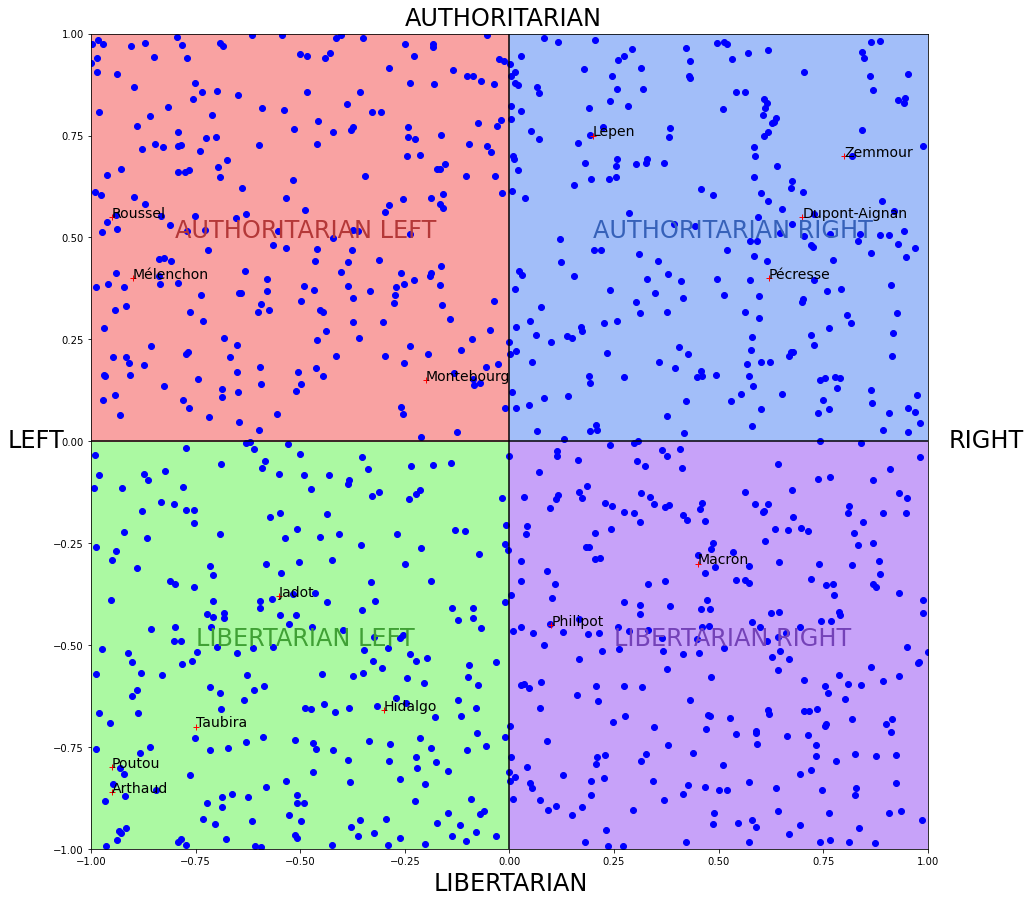

In [32]:
# faire un graphique comme le prof a fait et plot des points dans ce graphique => 
# avec la distance calculer les préférences de chacun

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# on prends comme exemple un politic compass, et on admets que les votants vont voter a chaque fois pour 
# les candidats qui sont les plus proches de leurs idées politiques (donc de leurs position => distance euclidienne)

# SOURCES : https://www.reddit.com/r/PoliticalCompass/comments/rsdf7t/political_compass_of_the_candidates_of_the_2022/

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)


#x = np.random.binomial(50, 0.5, 20000)
nombre_votants = 1000 # nb de votes

listeCoord = []

# Data for plotting
for i in range (0,nombre_votants):
    listeCoord.append([round(random.uniform(-1, 1.0),6),round(random.uniform(-1, 1.0),6)]) # entre -1 et 1, 4 chiffres après la virgule
    #print(round(random.uniform(-1, 1.0),6))
    #random.standard_normalro
    
for coord in listeCoord:
    plt.plot(coord[0], coord[1], 'bo')
    
# LABELS
plt.text(-0.8, 0.5, "AUTHORITARIAN LEFT", fontsize=24,color='#b43838')
plt.text(0.2, 0.5, "AUTHORITARIAN RIGHT", fontsize=24,color='#3661b9')
plt.text(-0.75, -0.5, "LIBERTARIAN LEFT", fontsize=24,color='#40a135')
plt.text(0.25, -0.5, "LIBERTARIAN RIGHT", fontsize=24,color='#7442b8')
plt.text(-1.2, -0.015, "LEFT", fontsize=24,color='black')
plt.text(1.05, -0.015, "RIGHT", fontsize=24,color='black')
plt.text(-0.25,1.02, "AUTHORITARIAN", fontsize=24,color='black')
plt.text(-0.18,-1.1, "LIBERTARIAN", fontsize=24,color='black')

# candidats présidentielle 2022, avec leurs position dans le graphique comme dans la source:
# PLOT YOUR CANDIDATES
dic = {"Zemmour":[0.8, 0.7],"Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Macron":[0.45, -0.3],"Philipot":[0.1, -0.45],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],
       "Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],"Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}

for name,coord in dic.items():
    plt.plot(coord[0],coord[1], 'r+')
    plt.text(coord[0],coord[1], name, fontsize=14,color='black')

# axes
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.vlines(x = 0, ymin=-1, ymax=1,color = 'black', linestyle = '-')

# couleurs rectangle
rect1 = Rectangle((0,0),-1,-1,color ='#abf9a2')
rect2 = Rectangle((0,0),-1,1,color ='#f9a2a2')
rect3 = Rectangle((0,0),1,1,color ='#a2bef9')
rect4 = Rectangle((0,0),1,-1,color ='#c7a2f9')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

plt.xlim([-1,1])
plt.ylim([-1,1])

#faire les fleches
#arrowed_spines(fig, ax)

plt.show()


# Simuler l'opinion politiques des candidats et donc leurs préférences parmit les candidats
def distanceEuclidienne(coord1,coord2):
    x1,y1 = coord1
    x2,y2 = coord2
    return math.sqrt(pow(x2-x1,2)+pow(y2-y1,2))

In [6]:
# LES DIFFÉRENTES MÉTHODES DE VOTES IMPLÉMENTÉES : 

# Scrutin majoritaire à un tour => FAIT
# Scrutin majoritaire à deux tours => FAIT
# Vote par approbation => FAIT
# Vote préférentiel => FAIT
# Méthode de Borda => FAIT
# Scrutin proportionnel =>
# Jugement majoritaire => https://www.youtube.com/watch?v=aOFlwlCX3oA
# Vote à second tour instantané (vote par élimination successive)


# "Le vote par élimination successive est utilisé pour l'élection présidentielle en Irlande,
# pour l'élection des députés en Australie et, depuis cette année, pour toutes les élections dans
# l'Etat du Maine aux Etats-Unis", selon Sylvain Bouveret, de l'université de Grenoble.


#"Kenneth Arrow, prix Nobel d'économie, a démontré en 1951 que le scrutin parfait n'existait pas, 
#donc on essaye de trouver celui qui reflète le plus possible la préférence des électeurs", 
#conclut Herrade Igersheim. Tout en gardant à l'esprit qu'en la matière "la neutralité n'existe pas".

In [19]:
def majoriteAbsolue(nbVoix,nbTotalVotant):
    if nbTotalVotant%2 == 0: # pair
        if nbVoix >= ((nbTotalVotant / 2) + 1):
            return True
        else:
            return False
    else: # impair
        if nbVoix >= (nbTotalVotant+1 / 2):
            return True
        else:
            return False

In [7]:
import math
import random

def approbation(): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        #aller jusqu'a len(dic) n'est pas adapté (personne ne vote comme ça ou très peu)
        nombreApprobation = int(round(random.uniform(1,4),0)) # entre 1 et 4 approbation par votant
        #nombreApprobation = 3 # 3 approbations max par votant
        
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        lastDic = {}
        # Les approbations sont faites en fonction de la distance avec chaque candidat
        for appro in range(nombreApprobation):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # OK, ici on a nos votes, il faut calculer donc le vainqueur 
    # calculer celui qui a le plus de votes 
    res = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if res.get(k):
                res[k] += 1
            else:
                res[k] = 1
  
    ordre = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    print(ordre)
    gagnant = list(ordre.keys())[0]
    print("\n Gagnant(s) du vote par approbation: ",gagnant)
    return gagnant
    
winnerApprobation = approbation()


# caluler le taux de satisfaction des électeurs pour le winner et si c'est le vainqueur de condorcet
# si c'est ni le vainqueurs de condorcet et qu'il n'as pas le meilleur de taux satisfaction la méthode n'est pas adaptée

{'Montebourg': 282, 'Philipot': 280, 'Pécresse': 276, 'Macron': 274, 'Jadot': 213, 'Hidalgo': 198, 'Mélenchon': 197, 'Dupont-Aignan': 185, 'Lepen': 177, 'Roussel': 165, 'Zemmour': 119, 'Taubira': 108, 'Poutou': 59, 'Arthaud': 31}

 Gagnant(s) du vote par approbation:  Montebourg


In [21]:
def uninominal(nbTours = 1): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        nbIteration = 1
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        lastDic = {}
        for appro in range(nbIteration):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # Résultats 1er tour :
    resultat1erTour = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if resultat1erTour.get(k):
                resultat1erTour[k] += 1
            else:
                resultat1erTour[k] = 1
                
    premierTour = dict(sorted(resultat1erTour.items(), key=lambda item: item[1],reverse=True))
    print("résultats 1er tour => \n",premierTour)
     
    
    # Si majoité absolue => pas de 2eme tour
    if majoriteAbsolue(list(premierTour.values())[0],nombre_votants):
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("majoité absolue !")
        print("\n Gagnant du vote uninominal : ",gagnant, " avec ",pourcentage,"%")
        return gagnant 
        
    if nbTours == 2:
        cptVotant = 0
        resVotes = {}
        for coordV in listeCoord:
            tmpDistance = {}
            # prendre les noms et coordonnées des 2 premiers :
            premier = dic.get(list(premierTour.keys())[0])
            deuxieme = dic.get(list(premierTour.keys())[1])
            deuxPremiers = {}
            deuxPremiers[list(premierTour.keys())[0]] = premier
            deuxPremiers[list(premierTour.keys())[1]] = deuxieme
            
            for candidat,coordC in deuxPremiers.items():
                tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
            
            lastDic = {}
            for k,v in tmpDistance.items():
                if v==min(tmpDistance.values()):
                    lastDic[k] = v
                    
            resVotes[cptVotant] = lastDic
            cptVotant +=1
        
        # Résultats 2nd tour :
        resultat2emeTour = {}
        for dico in resVotes.values():
            for k,v in dico.items():
                if resultat2emeTour.get(k):
                    resultat2emeTour[k] += 1
                else:
                    resultat2emeTour[k] = 1
        secondTour = dict(sorted(resultat2emeTour.items(), key=lambda item: item[1],reverse=True))
        print("\n résultats 2eme tour => \n",secondTour)
        gagnant = list(secondTour.keys())[0]
        nb_voix = list(secondTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("\n Gagnant du vote uninominal à 2 tours : ",gagnant, " avec ",pourcentage,"%")
        return gagnant
    
    else:
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("\n Gagnant du vote  uninominal à 1 tour: ",gagnant, " avec ",pourcentage,"%")
        return gagnant
    
winnerUninominal = uninominal(2)

résultats 1er tour => 
 {'Macron': 165, 'Lepen': 120, 'Montebourg': 117, 'Philipot': 96, 'Jadot': 85, 'Pécresse': 80, 'Roussel': 72, 'Mélenchon': 65, 'Hidalgo': 63, 'Zemmour': 48, 'Taubira': 44, 'Dupont-Aignan': 27, 'Arthaud': 13, 'Poutou': 5}

 résultats 2eme tour => 
 {'Macron': 552, 'Lepen': 448}

 Gagnant du vote uninominal à 2 tours :  Macron  avec  55.2 %


In [9]:
# $ pip install condorcet
import condorcet

# VOTE PRÉFÉRENTIEL : => faire le test de condorcet, une méthode de votes est 'bonne' si elle n'élu jamais le perdant
# de condorcet

def preferentiel(): # OK
    candidates = []
    for candidate in dic.keys():
        candidates.append(candidate) # nom des candidats
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de 1 à len(candidats) : (1 => le mieux noté)
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1 
        
        votes.append(preferencesVotant)
        
    evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
    # returns a list containing at most the first n winners in order
    # and the rest
    winners, rest_of_table = evaluator.get_n_winners(1)

    print("\n Gagnant du vote préféretiel (par condorcet): ",winners,"\n")
    print("\n reste de la table : ",rest_of_table)
    return winners
    
winnerPreferentiel = preferentiel()


 Gagnant du vote préféretiel (par condorcet):  ['Montebourg'] 


 reste de la table :  {'Dupont-Aignan': {'wins': ['Zemmour', 'Mélenchon', 'Roussel', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Pécresse', 'Lepen', 'Macron', 'Philipot', 'Jadot', 'Hidalgo']}, 'Zemmour': {'wins': ['Roussel', 'Poutou', 'Arthaud'], 'losses': ['Dupont-Aignan', 'Pécresse', 'Lepen', 'Macron', 'Philipot', 'Mélenchon', 'Jadot', 'Hidalgo', 'Taubira']}, 'Pécresse': {'wins': ['Zemmour', 'Dupont-Aignan', 'Lepen', 'Mélenchon', 'Roussel', 'Hidalgo', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Macron', 'Philipot', 'Jadot']}, 'Lepen': {'wins': ['Zemmour', 'Dupont-Aignan', 'Mélenchon', 'Roussel', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Pécresse', 'Macron', 'Philipot', 'Jadot', 'Hidalgo']}, 'Macron': {'wins': ['Zemmour', 'Dupont-Aignan', 'Pécresse', 'Lepen', 'Mélenchon', 'Roussel', 'Jadot', 'Hidalgo', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Philipot']}, 'Philipot': {'wins': ['Zemmour', 'Dupont-Aignan', 'Pécre

In [18]:
# VOTE DE BORDA : (type vote préférentiel)

def methodeDeBorda():
    candidates = []
    for candidate in dic.keys():
        candidates.append(candidate) # nom des candidats
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de len(candidats) à 1 : (la + note la plus haute => mieux est le candidat)
        cptCandidat = len(dic)
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat -=1 
        
        votes.append(preferencesVotant)
    
    # Résultats : 
    res = {}
    for dico in votes:
        for k,v in dico.items():
            if res.get(k):
                res[k] += v
            else:
                res[k] = v
                
    res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    print("\n résultats => \n",res)
    gagnant = list(res.keys())[0]
    print("\n Gagnant du vote de Borda : ",gagnant)
    return gagnant
    
winnerBorda = methodeDeBorda()


 résultats => 
 {'Montebourg': 10434, 'Philipot': 9535, 'Jadot': 9124, 'Macron': 8870, 'Pécresse': 8620, 'Hidalgo': 8444, 'Lepen': 8022, 'Dupont-Aignan': 7283, 'Mélenchon': 7108, 'Taubira': 6851, 'Roussel': 5890, 'Zemmour': 5708, 'Poutou': 5032, 'Arthaud': 4079}

 Gagnant du vote de Borda :  Montebourg


In [12]:
# Vote par élimination successive => à chaque tours on enlève le dernier, et on continu jusqu'à ce 
# qu'il reste un seul candidat ou si un candidat à la majorité absolue ( 50 % + 1 )

# essayer avec et sans majorité Absolue pour voir si ça change



# Dans sa forme absolue, où l’électeur est obligé de classer tous les candidats


# A REVOIR LA METHODE

dicCandidat = dic.copy()
def eliminationSucessiveMajoriteAbsolue(dic):
    candidates = []
    for candidate in dic.keys():
        candidates.append(candidate) # nom des candidats
    votes = []
    #print(listeVotes)
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de 1 à len(candidats) :
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1         
        votes.append(preferencesVotant)


    res = {}
    for vote in votes:
        for nom,classement in vote.items():
            if res.get(nom):
                # c'est ici que c'est pas bon, cela doit etre l'inverse
                res[nom] += len(dic)-classement
            else:
                res[nom] = len(dic)-classement
    
    res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    scorePremier = list(res.values())[0]
    
    #bug ici
    #if (scorePremier/nombre_votants)*100 >= 51:
    if len(dic) == 1:
        print("fini")
        print(res)
        #print(len(dicCandidat))
        return list(res.keys())[0]
        
    else:
        last_key_res = list(res)[-1]
        # on enlève le dernier
        dic.pop(last_key_res)
        print(res)
        eliminationSucessiveMajoriteAbsolue(dic)
    
    
    
winner = eliminationSucessiveMajoriteAbsolue(dicCandidat)


{'Montebourg': 9434, 'Philipot': 8535, 'Jadot': 8124, 'Macron': 7870, 'Pécresse': 7620, 'Hidalgo': 7444, 'Lepen': 7022, 'Dupont-Aignan': 6283, 'Mélenchon': 6108, 'Taubira': 5851, 'Roussel': 4890, 'Zemmour': 4708, 'Poutou': 4032, 'Arthaud': 3079}
{'Montebourg': 8590, 'Philipot': 7695, 'Jadot': 7178, 'Macron': 7130, 'Pécresse': 6955, 'Hidalgo': 6525, 'Lepen': 6361, 'Dupont-Aignan': 5664, 'Mélenchon': 5468, 'Taubira': 4866, 'Roussel': 4309, 'Zemmour': 4132, 'Poutou': 3127}
{'Montebourg': 7748, 'Philipot': 6880, 'Macron': 6410, 'Pécresse': 6303, 'Jadot': 6235, 'Lepen': 5709, 'Hidalgo': 5629, 'Dupont-Aignan': 5056, 'Mélenchon': 4843, 'Taubira': 3883, 'Roussel': 3733, 'Zemmour': 3571}
{'Montebourg': 6989, 'Philipot': 6194, 'Macron': 5720, 'Jadot': 5624, 'Pécresse': 5386, 'Hidalgo': 5033, 'Lepen': 4995, 'Mélenchon': 4325, 'Dupont-Aignan': 4111, 'Taubira': 3379, 'Roussel': 3244}
{'Montebourg': 6128, 'Philipot': 5489, 'Macron': 5056, 'Jadot': 4918, 'Pécresse': 4770, 'Hidalgo': 4407, 'Lepen': 43